Apply the following phase operator to the state |00>

$\begin{bmatrix}
    e^{-i\pi/2} & 0 & 0 & 0 \\
    0 & e^{-i\pi/4} & 0 & 0 \\
    0 & 0 & e^{-i\pi/2} & 0 \\
    0 & 0 & 0 & e^{-i\pi/4} 
\end{bmatrix}$

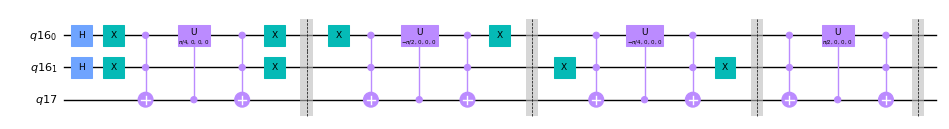

In [12]:
from qiskit import *
from qiskit.quantum_info import Statevector
import numpy as np 
no_of_qubits = 2

phases = {
    '00': np.pi/4,
    '01': -np.pi/2,
    '10': -np.pi/4,
    '11': np.pi/2,
}

q = QuantumRegister(no_of_qubits)
a = QuantumRegister(1)

QC = QuantumCircuit(q, a)

for i in range(no_of_qubits):
    QC.h(q[i])

for xgates,phase in phases.items():
    for n in range(no_of_qubits):
        if xgates[n] == '0':
            QC.x(q[n])
    
    # activate ancilla. 
    QC.ccx(q[0], q[1], a[0])

    QC.cu(phase, 0,0,0, a[0], q[0])

    # deactivate ancilla
    QC.ccx(q[0], q[1], a[0])

    for n in range(no_of_qubits):
        if xgates[n] == '0':
            QC.x(q[n])

    QC.barrier()
QC.draw(fold=1000, output="mpl", scale=0.5)


In [13]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>